In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv('supermarket_sales.csv')
sales.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
Invoice ID                 1000 non-null object
Branch                     1000 non-null object
City                       1000 non-null object
Customer type              1000 non-null object
Gender                     1000 non-null object
Product line               1000 non-null object
Unit price                 1000 non-null float64
Quantity                   1000 non-null int64
Tax 5%                     1000 non-null float64
Total                      1000 non-null float64
Date                       1000 non-null object
Time                       1000 non-null object
Payment                    1000 non-null object
cogs                       1000 non-null float64
gross margin percentage    1000 non-null float64
gross income               1000 non-null float64
Rating                     1000 non-null float64
dtypes: float64(7), int64(1), object(9)
memory usage: 132.9+ KB


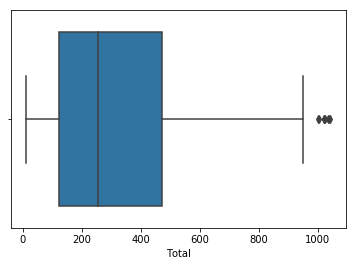

In [5]:
sns.boxplot(data=sales, x='Total', hue='Gender')

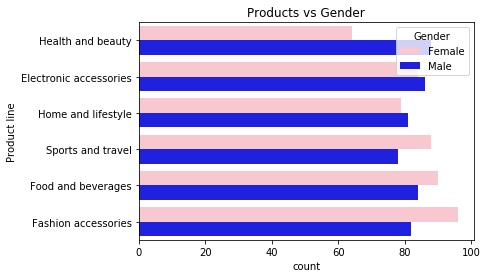

In [7]:
sns.countplot(data=sales, y='Product line', hue='Gender', palette=['pink', 'blue'])
plt.title('Products vs Gender')
plt.show()

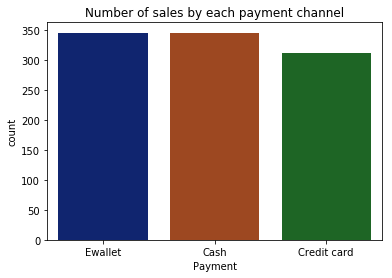

In [9]:
sns.countplot(x="Payment", data =sales,palette=sns.color_palette("dark")).set_title("Number of sales by each payment channel")
plt.show()

In [10]:
# dealing with date and time

sales['Date'] = pd.to_datetime(sales['Date'])

sales['Day'] = (sales['Date']).dt.day
sales['Month'] = (sales['Date']).dt.month

# sales['Month'] = sales['Month'].apply(lambda x: calendar.month_name[x])

sales['Time'] = pd.to_datetime(sales['Time'])
sales['Hour'] = (sales['Time']).dt.hour

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


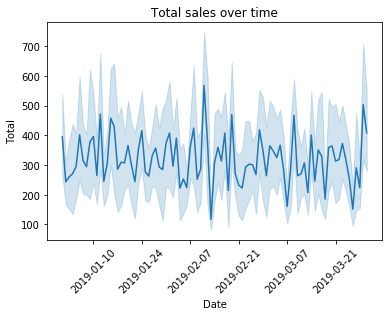

In [11]:

sns.lineplot(data=sales, x='Date', y='Total')
plt.xticks(rotation=45)
plt.title('Total sales over time')
plt.show()

In [12]:
sales.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


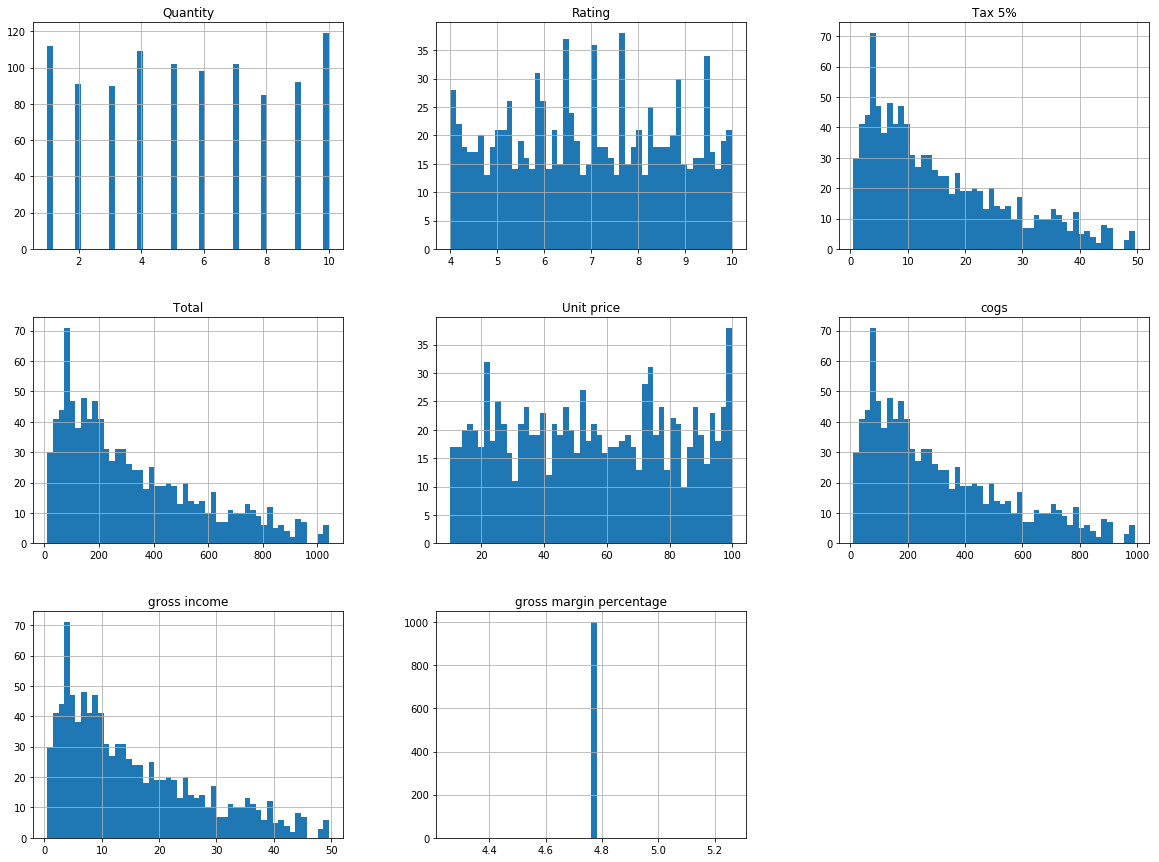

In [13]:

attributes = ["Unit price","Quantity","Tax 5%","Total","cogs","gross margin percentage","gross income","Rating"]
%matplotlib inline
import matplotlib.pyplot as plt
sales[attributes].hist(bins=50, figsize=(20,15))
plt.show()

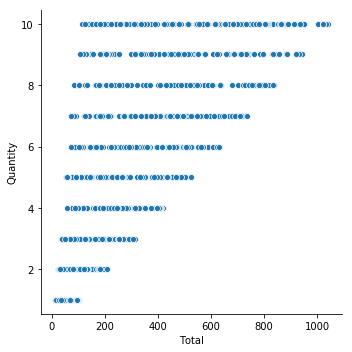

In [14]:
 sns.relplot(x="Total",  y = "Quantity", data =sales)

In [15]:
customer_payment = sales.groupby(['Customer type', 'Payment'])['Total'].sum().reset_index()
customer_payment

,Customer type,Payment,Total
0,Member,Cash,54661.0155
1,Member,Credit card,57771.4725
2,Member,Ewallet,51790.9560
3,Normal,Cash,57545.5545
4,Normal,Credit card,42995.5995
5,Normal,Ewallet,58202.1510


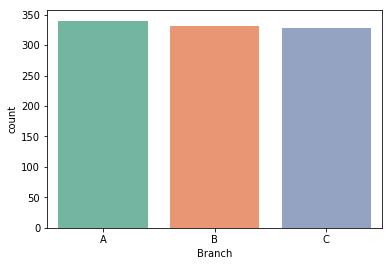

In [16]:
graph=sns.countplot(data=sales,x="Branch",order=sales.Branch.value_counts().index,palette="Set2")
plt.show()

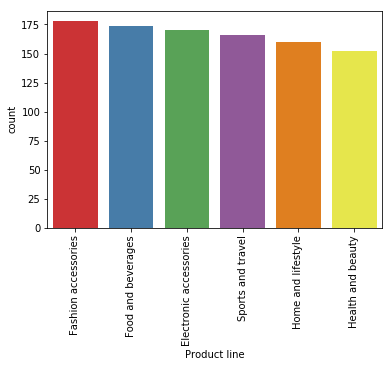

In [17]:
graph2=sns.countplot(data=sales,x="Product line",order=sales["Product line"].value_counts().index,palette="Set1")
_=plt.setp(graph2.get_xticklabels(),rotation=90)
plt.show()

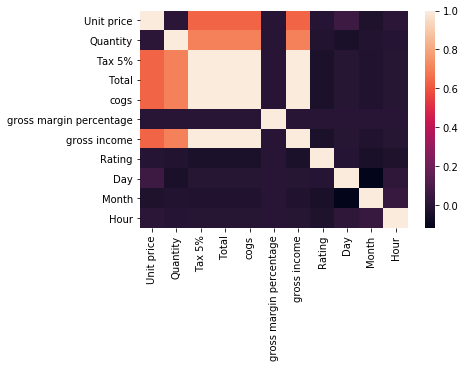

In [18]:
sns.heatmap(sales.corr())

In [19]:
# Remove unnecessary columns that don't contribute to sales prediction
sales.drop(['Invoice ID', 'Date', 'Time', 'gross margin percentage'], axis=1, inplace=True)

In [20]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(sales, columns=['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'], drop_first=True)

In [21]:
X = df_encoded.drop('Total', axis=1)
y = df_encoded['Total']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
 #Initialize the Linear Regression model
linear_regressor = LinearRegression()
# Train the model
linear_regressor.fit(X_train, y_train)

# Predictions on the testing set
y_pred = linear_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 4.7217174818695033e-26
Mean Absolute Error (MAE): 1.7838175381257315e-13
Root Mean Squared Error (RMSE): 2.1729513298436998e-13
R-squared (R2): 1.0


In [25]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)

Mean Absolute Error (MAE): 1.1668754999999962
Root Mean Squared Error (RMSE): 1.8852555993153768
